# FIT5196 Assessment 3
#### Student Name: Gayatri Aniruddha
#### Student ID: 30945305
#### Student Email: gani0001@student.monash.edu

Date: 18/11/2020

Environment: Python 3 and Jupyter notebook

# Table of Contents:
* [1. Introduction](#sec_1)
* [2. Methodology](#sec_2)
    * [2.1 Task 1 : Data Integration : Part A: Reading Data](#sec_21)
        * [2.1.1 Data : real_state.json ( Property Data 1)](#sec_211)
        * [2.1.2 Data : real_state.xml ( Property Data 2)](#sec_212)
        * [2.1.3 Data : shopingcenters.html ](#sec_213)
        * [2.1.4 Data : supermarkets.pdf ](#sec_214)
        * [2.1.5 Data : hospitals.xlsx](#sec_215)
        * [2.1.6 Data : GTFS - Melbourne Train Information : Individual Text Files ](#sec_216)
        * [2.1.7 Data : VIC Suburb Boundary](#sec_217)
    * [2.2 Part B : Additional Computed Columns](#sec_22)
        * [2.2.1 Distance_to_sc](#sec_221)
        * [2.2.2 Shopping_center_id](#sec_222)
        * [2.2.3 Distance_to_hospital](#sec_223)
        * [2.2.4 Hospital_id](#sec_224)
        * [2.2.5 Distance_to_supermarket](#sec_225)
        * [2.2.6 Supermarket_id](#sec_226) 
        * [2.2.7 Transfer_flag](#sec_227) 
        * [2.2.8 Train_station_id, travel_min_to_CBD, Distance_to_train_station](#sec_228) 
    * [2.3 Task 2 : Data Reshaping](#sec_23) 
        * [2.3.1 Data Transformation :- Log, Power and Box-Cox](#sec_231) 
        * [2.3.2 Data Normalization :- Z Transform and Min-Max)](#sec_232) 
* [3. Dicussion and Analysis](#sec_3)
* [4. Conclusion](#sec_4)
* [5. References](#sec_5)

# 1. Introduction <a class="anchor" id="sec_1"></a>

* This assignment revolves around integrating several datasets into one standard form, calculating the different additional columns and performing data normalizations and data transformations!
* We have been given 7 datasets and it's about the housing information in Victoria.

### Assumptions
* The following files are in the current directory:
    * hospitals.xlsx
    * real_state.json
    * real_state.xml
    * shopingcenters.html
    * supermarkets.pdf
    * Melbourne Train Information Files
    * vic_suburb_boudary file


# 2. Methodology <a class="anchor" id="sec_2"></a>

### Importing Libraries

In [1]:
# Handling Dataframes 
import pandas as pd

# Numeric Calculations 
import numpy as np

# For mathematical calculations 
import math

# For regular expressions in order to extract the xml data 
import re

# For reading the json data
import json

# For reading in the xml data
import bs4
from bs4 import BeautifulSoup

# For reading in the pdf data 
import tabula 

# For performing box-cox transformation
from scipy import stats

# For plotting functions 
import matplotlib as mpl
import matplotlib.pyplot as plt

# For z transform and min max tranformations 
from sklearn import preprocessing

# For splitting the dataset into training and testing data 
from sklearn.model_selection import train_test_split

# In order to calculate the mean squared error
from sklearn.metrics import mean_squared_error, r2_score

# In order to train the linear model 
from sklearn.linear_model import LinearRegression

In [2]:
# For reading in the shape files


# import shapefile
# #import geopandas
# from shapely.geometry import Point, Polygon

## 2.1 Task 1 : Data Integration : Part A : Reading Data <a class="anchor" id="sec_21"></a>

* This section revolves around reading in the various datasets present in various formats such as json data, xml data, html data, pdf data, and excel data.
* After reading in the data, this section then covers merging the data into one integrated format which has been named as integrated_data. 
* We would be reading the various data-formats in the following manner:
    * **json data** using read_json function 
    * **xml data** using regular expressions 
    * **html data** using read_html function
    * **pdf data** using tabula 
    * **excel data** using read_excel function 

### 2.1.1 Data : real_state.json ( Property Data 1) <a class="anchor" id="sec_211"></a>

In [3]:
# Reading in the json_data 
real_state_json_data = pd.read_json('real_state.json')
real_state_json_data.to_csv ('real_state.csv', index = None)

In [4]:
# Displaying the json_data 
real_state_json_data.head(2)

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,39345,-37.694100,145.056091,1/40 McLeans Road,5753000,house,2011,3,2,1
1,58362,-37.826197,145.153935,8 Wellington Avenue,15680000,house,2015,3,2,2


In [5]:
# Renaming the property id column as per the specification 
real_state_json_data.rename(columns = {'property_id': 'Property_id'}, inplace = True)
real_state_json_data.head(2)

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,39345,-37.694100,145.056091,1/40 McLeans Road,5753000,house,2011,3,2,1
1,58362,-37.826197,145.153935,8 Wellington Avenue,15680000,house,2015,3,2,2


### 2.1.2 Data : real_state.xml ( Property Data 2) <a class="anchor" id="sec_212"></a>

In [6]:
# Opening the XML File 
real_state_xml = open("real_state.xml", "r")

# Reading in the xml data 
real_state = BeautifulSoup(real_state_xml, "html.parser")

# Converting into a string format 
real_state_combined = str(real_state)

In [7]:
# Creating the regex 
property_id_regex = '<property_id type="dict">(.*?)</property_id>'
lat_regex = '<lat type="dict">(.*?)</lat>'
lng_regex = '<lng type="dict">(.*?)</lng>'
addr_street_regex = '<addr_street type="dict">(.*?)</addr_street>'
price_regex = '<price type="dict">(.*?)</price>'
property_type_regex = '<property_type type="dict">(.*?)</property_type>'
bedrooms_regex = '<bedrooms type="dict">(.*?)</bedrooms>'
year_regex = '<year type="dict">(.*?)</year>'
bathrooms_regex = '<bathrooms type="dict">(.*?)</bathrooms>'
parking_space_regex = '<parking_space type="dict">(.*?)</parking_space>'


# Finding and Extracting using regex 
# for property_id 
find_property_id = re.findall(property_id_regex,real_state_combined,re.DOTALL)
for i in find_property_id:
    id_regex = "<n[\d]+ type=\"int\">(.*?)</n[0-9]+>"
    property_id_list =  re.findall(id_regex,i,re.DOTALL)

# for lat 
find_lat = re.findall(lat_regex,real_state_combined,re.DOTALL)
for i in find_lat:
    lat_regex = "<n[\d]+ type=\"float\">(.*?)</n[0-9]+>"
    lat_list =  re.findall(lat_regex,i,re.DOTALL)

# for lng 
find_lng = re.findall(lng_regex,real_state_combined,re.DOTALL)
for i in find_lng:
    lng_regex = "<n[\d]+ type=\"float\">(.*?)</n[0-9]+>"
    lng_list =  re.findall(lng_regex,i,re.DOTALL)

# for address street 
find_addr_street = re.findall(addr_street_regex,real_state_combined,re.DOTALL)
for i in find_addr_street:
    adress_regex = "<n[\d]+ type=\"str\">(.*?)</n[0-9]+>"
    adress_list =  re.findall(adress_regex,i,re.DOTALL)

# for price 
find_price = re.findall(price_regex,real_state_combined,re.DOTALL)
for i in find_price:
    price_regex = "<n[\d]+ type=\"int\">(.*?)</n[0-9]+>"
    price_list =  re.findall(price_regex,i,re.DOTALL)

# for property 
find_property = re.findall(property_type_regex,real_state_combined,re.DOTALL)
for i in find_property:
    type_regex = "<n[\d]+ type=\"str\">(.*?)</n[0-9]+>"
    type_list =  re.findall(type_regex,i,re.DOTALL)

# for year 
find_year = re.findall(year_regex,real_state_combined,re.DOTALL)
for i in find_year:
    year_regex = "<n[\d]+ type=\"int\">(.*?)</n[0-9]+>"
    year_list =  re.findall(year_regex,i,re.DOTALL)

# for bedrooms 
find_bedrooms = re.findall(bedrooms_regex,real_state_combined,re.DOTALL)
for i in find_bedrooms:
    bedrooms_regex = "<n[\d]+ type=\"int\">(.*?)</n[0-9]+>"
    bedrooms_list =  re.findall(bedrooms_regex,i,re.DOTALL)

# for bathrooms 
find_bathrooms = re.findall(bathrooms_regex,real_state_combined,re.DOTALL)
for i in find_bathrooms:
    bathrooms_regex = "<n[\d]+ type=\"int\">(.*?)</n[0-9]+>"
    bathrooms_list =  re.findall(bathrooms_regex,i,re.DOTALL)

# for parking space 
find_parking_space = re.findall(parking_space_regex,real_state_combined,re.DOTALL)
for i in find_parking_space:
    parking_space_regex = "<n[\d]+ type=\"int\">(.*?)</n[0-9]+>"
    parking_space_list =  re.findall(parking_space_regex,i,re.DOTALL)

In [8]:
# Creating a df from the combined xml data 
df_realstate_xml = pd.DataFrame(list(zip(property_id_list, lat_list,lng_list,adress_list,price_list,type_list,year_list,bedrooms_list,bathrooms_list,parking_space_list)), 
               columns =['Property_id', 'lat','lng','addr_street','price','property_type','year','bedrooms','bathrooms','parking_space']) 

In [9]:
# Displaying the xml real_state 
df_realstate_xml.head(2)

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1
1,3979,-37.81578064,144.8942719,96 Stephen Street,7136000,house,2009,2,1,1


In [10]:
# Converting the json data into a dataframe 
df_realstate_json = pd.read_csv('real_state.csv', )

In [11]:
# Displaying the json real_state 
df_realstate_json.head(2)

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,39345,-37.694100,145.056091,1/40 McLeans Road,5753000,house,2011,3,2,1
1,58362,-37.826197,145.153935,8 Wellington Avenue,15680000,house,2015,3,2,2


In [12]:
# Renaming column name for the json dataframe 
df_realstate_json.rename(columns = {'property_id':'Property_id'}, inplace = True) 

In [13]:
df_realstate_json.head(2)

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,39345,-37.694100,145.056091,1/40 McLeans Road,5753000,house,2011,3,2,1
1,58362,-37.826197,145.153935,8 Wellington Avenue,15680000,house,2015,3,2,2


In [14]:
# Shape of real_state json 
df_realstate_json.shape

(1010, 10)

In [15]:
# Shape of real_state xml 
df_realstate_xml.shape

(1001, 10)

In [16]:
# Creating a list of both the dataframes 
df_xml_and_json = [df_realstate_xml, df_realstate_json]

In [17]:
# Join the data 
integrated_data = pd.concat(df_xml_and_json, sort = False)

In [18]:
integrated_data.head(2)

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1
1,3979,-37.81578064,144.8942719,96 Stephen Street,7136000,house,2009,2,1,1


In [19]:
# Shape of our first version of integrated data 
integrated_data.shape

(2011, 10)

In [20]:
# Dropping the duplicated data 
integrated_data.drop_duplicates(subset ="Property_id", keep = False, inplace = True) 

In [21]:
# Shaoe after dropping duplicates 
integrated_data.shape

(2003, 10)

### 2.1.3 Data : shopingcenters.html <a class="anchor" id="sec_213"></a>

In [22]:
# Reading in the html data 
html_data = r"shopingcenters.html"

# Opening the html file
shopingcenter_data = open(html_data, 'r')

# Reading the shopping centre data file  
html_data_read = shopingcenter_data.read()

# Reading the html data as a dataframe 
html_data_df = pd.read_html(html_data_read)

# Converting the html data into a csv format 
for i, table in enumerate(html_data_df):
    table.to_csv('shopingcenters.csv'.format(i))

In [23]:
# Reading in the csv data 
shopingcenter_data = pd.read_csv("shopingcenters.csv")
shopingcenter_data.head(2)

,Unnamed: 0,Unnamed: 0.1,sc_id,lat,lng
0,0,0,SC_001,-37.767915,145.041790
1,1,1,SC_002,-37.819375,145.171472


In [24]:
# Deleting unwanted columns
del shopingcenter_data['Unnamed: 0']
del shopingcenter_data['Unnamed: 0.1']

In [25]:
# Displaying the shopingcenter data 
shopingcenter_data.head(2)

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472


### 2.1.4 Data : supermarkets.pdf <a class="anchor" id="sec_214"></a>

In [26]:
# Converting into csv 
tabula.convert_into("supermarkets.pdf","supermarkets.csv", pages='all')

# Reading in the csv data 
supermarkets_data = pd.read_csv("supermarkets.csv")
supermarkets_data.head(2)

,Unnamed: 0,id,lat,lng,type
0,0.0,S_001,-37.883978,144.735287,Woolworths
1,1.0,S_002,-41.161591,147.514797,Woolworths


In [27]:
# Deleting unwanted columns
del supermarkets_data['Unnamed: 0']

In [28]:
# Displaying the supermarket data
supermarkets_data.head(2)

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths


In [29]:
supermarkets_data.shape

(243, 4)

In [30]:
# Correcting some mistakes 
mistakes = supermarkets_data[( supermarkets_data['lat'] == 'lat') | (supermarkets_data['lng'] == 'lng') ] 
supermarkets_data = supermarkets_data.drop(mistakes.index, axis = 0) 

supermarkets_data.shape

(239, 4)

In [31]:
supermarkets_data['lat_long'] = list(zip(supermarkets_data.lat, supermarkets_data.lng))
supermarkets_lat_long = supermarkets_data['lat_long'].to_list()
supermarkets_data.head(2)

,id,lat,lng,type,lat_long
0,S_001,-37.883978,144.735287,Woolworths,"(-37.883978, 144.735287)"
1,S_002,-41.161591,147.514797,Woolworths,"(-41.161591, 147.514797)"


In [32]:
supermarkets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 242
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        239 non-null    object
 1   lat       239 non-null    object
 2   lng       239 non-null    object
 3   type      239 non-null    object
 4   lat_long  239 non-null    object
dtypes: object(5)
memory usage: 11.2+ KB


In [33]:
# Converting the datatype for distance calculation 
supermarkets_data['lat_long'] = pd.to_numeric(supermarkets_data['lat_long'], errors='coerce').fillna(0)
supermarkets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 242
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        239 non-null    object 
 1   lat       239 non-null    object 
 2   lng       239 non-null    object 
 3   type      239 non-null    object 
 4   lat_long  239 non-null    float64
dtypes: float64(1), object(4)
memory usage: 11.2+ KB


### 2.1.5 Data : hospitals.xlsx <a class="anchor" id="sec_215"></a>

In [34]:
# Reading in the excel data 
hospital_data = pd.read_excel('hospitals.xlsx')
hospital_data.head(2)

,Unnamed: 0,id,lat,lng,name
0,0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital


In [35]:
# Structure of the hospital data 
hospital_data.shape

(199, 5)

In [36]:
# General information about the hospital data 
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  199 non-null    int64  
 1   id          199 non-null    object 
 2   lat         199 non-null    float64
 3   lng         199 non-null    float64
 4   name        199 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 7.9+ KB


In [37]:
# Deleting unwanted columns 
del hospital_data['Unnamed: 0']
hospital_data.head(2)

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital


### 2.1.6 Data : GTFS - Melbourne Train Information : Individual Text Files <a class="anchor" id="sec_216"></a>

In [38]:
# Reading in the GTFS data 
agency_data = pd.read_csv("GTFS - Melbourne Train Information/agency.txt")
calendar_data = pd.read_csv("GTFS - Melbourne Train Information/calendar.txt")
calendar_dates_data = pd.read_csv("GTFS - Melbourne Train Information/calendar_dates.txt")
routes_data = pd.read_csv("GTFS - Melbourne Train Information/routes.txt")
shapes_data = pd.read_csv("GTFS - Melbourne Train Information/shapes.txt")
stop_times_data = pd.read_csv("GTFS - Melbourne Train Information/stop_times.txt")
stops_data = pd.read_csv("GTFS - Melbourne Train Information/stops.txt")
trips_data = pd.read_csv("GTFS - Melbourne Train Information/trips.txt")

### 2.1.7 Data : VIC Suburb Boundary <a class="anchor" id="sec_217"></a>

In [39]:
# # # For reading in the shape files
# # import geos

# import shapefile
# import geopandas
# from shapely.geometry import Point, Polygon

In [40]:
# gdf = geopandas.read_file("vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.shp")

In [41]:
# print("Shape of the Suburb File:", gdf.shape)
# gdf.head()

##  2.2 Part B : Additional Computed Columns <a class="anchor" id="sec_22"></a>

* This section revolves around computing the following additional columns!
    * Suburb in which the property is present 
    * Distance to the nearest shopping center
    * Nearest shopping center ID
    * Distance to the nearest hospital 
    * Nearest hospital ID
    * Distance to the nearest supermarket 
    * Nearest supermarket ID
    * Distance to the nearest train-station 
    * Nearest train-station ID
    * Minimum time taken to reach the CBD 
    * Transfer Flag indicating if there is a direct route 
    
* The various distances have been calculated using the haversine distance.
* I have even defined various functions to compute the distances and the IDS.

### Suburb
* This specifies the suburb of the property.


In [42]:
# Creating a new empty column for Suburb 
integrated_data['Suburb'] = 'not available'

In [43]:
integrated_data.head()

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Suburb
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1,not available
1,3979,-37.81578064,144.8942719,96 Stephen Street,7136000,house,2009,2,1,1,not available
2,20162,-37.800715999999994,144.973143,37 Owen Street,12870000,house,2011,2,1,1,not available
3,52140,-37.814572999999996,144.994122,11 Leeds Street,6314000,house,2015,1,1,1,not available
4,81404,-37.978701,145.199705,6 Campbell Street,4914000,house,2010,3,1,1,not available


In [44]:
# # Creating a dictionary for suburb from the above shape files 
# suburbs_dictionary = dict(zip(list(gdf['VIC_LOCA_2']),list(gdf['geometry'])))

In [45]:
# # This function returns the Suburb from the shape file data frame
# def return_suburb(lng, lat):
    
#     # Dimensions of the given point 
#     given_point = Point(lng, lat)
    
#     # Iterating through the suburb dictionary 
#     for key,values in suburbs_dictionary.items():
        
#         # Creating the suburb based on values 
#         suburb = Polygon(values)
        
#         # Checking if the given point is contained in the suburb 
#         if suburb.contains(given_point):
#             # Return the particular suburb 
#             return key
#     return "not available"

In [46]:
# integrated_data['Suburb'] = integrated_data.apply(lambda row: return_suburb(row["lng"], row["lat"]), axis=1)

In [47]:
integrated_data.head()

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Suburb
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1,not available
1,3979,-37.81578064,144.8942719,96 Stephen Street,7136000,house,2009,2,1,1,not available
2,20162,-37.800715999999994,144.973143,37 Owen Street,12870000,house,2011,2,1,1,not available
3,52140,-37.814572999999996,144.994122,11 Leeds Street,6314000,house,2015,1,1,1,not available
4,81404,-37.978701,145.199705,6 Campbell Street,4914000,house,2010,3,1,1,not available


### 2.2.1 Distance_to_sc <a class="anchor" id="sec_221"></a>

* This gives is the Euclidean distance from the nearest shopping center to the given property.
* Default Value:0

In [48]:
# Function to calculate the distance between two geological locations 
def haversine_distance(lat1, lon1, lat2, lon2):
   # As per the specification provided 
   r = 6378

   # Calculating the phi values  
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)

   # Calculating the delta and lambda values  
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
    
   # Distance calculated as per the haversine distance formula 
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   hav_distance = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(hav_distance, 4)

In [49]:
# In order to later extract the id in an easier manner 
shopingcenter_data['lat_long_id'] = list(zip(shopingcenter_data.lat, shopingcenter_data.lng, shopingcenter_data.sc_id ))
shopingcenter_data_lat_long_id = shopingcenter_data['lat_long_id'].to_list()
shopingcenter_data.head(2)

,sc_id,lat,lng,lat_long_id
0,SC_001,-37.767915,145.041790,"(-37.767915, 145.04179, SC_001)"
1,SC_002,-37.819375,145.171472,"(-37.819375, 145.171472, SC_002)"


In [50]:
# Function to calculate the nearest shoping center distance 
def nearest_shopingcenter_distance(row):
    
    # Getting the property coordinates 
    prop_lng = float(row.lng)
    prop_lat = float(row.lat)
    
    # Initializing dictionaries to store the distance values 
    distance_dict = dict()
    
    # Iterating through the list 
    for location in shopingcenter_data_lat_long_id:
        super_lat = float(location[0])
        super_lng = float(location[1])
        
        # Calculating the distance using the function 
        calc_distance = haversine_distance(prop_lat, prop_lng, super_lat, super_lng)
        distance_dict[location] = calc_distance
    
    # Storing all the values 
    all_values = distance_dict.values()
    
    # Calculating the min value 
    nearest_distance = min(all_values)
    
    # Returning the least distance 
    return nearest_distance

In [51]:
# Nearest Shopping Centre distance
integrated_data['Distance_to_sc'] = integrated_data.apply(lambda x: nearest_shopingcenter_distance(x), axis = 1)
integrated_data.head(2)

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Suburb,Distance_to_sc
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1,not available,2.6713
1,3979,-37.81578064,144.8942719,96 Stephen Street,7136000,house,2009,2,1,1,not available,3.7905


In [52]:
integrated_data.head(2)

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Suburb,Distance_to_sc
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1,not available,2.6713
1,3979,-37.81578064,144.8942719,96 Stephen Street,7136000,house,2009,2,1,1,not available,3.7905


### 2.2.2 Shopping_center_id  <a class="anchor" id="sec_222"></a>
* This gives us the id of the closest shopping center to the property.
* Default Value: 0


In [53]:
# Function to calculate the nearest shoping center ID 
def nearest_shopingcenter_id(row):  
    
    # Property Coordinates 
    prop_lng = float(row.lng)
    prop_lat = float(row.lat)
    
    # Dictionary to store the IDs 
    distance_id_dict = dict()
    
    # Iterating through the list 
    for location in shopingcenter_data_lat_long_id:
        sc_lat = float(location[0])
        sc_lng = float(location[1])
        sc_ID = location[2]
        
        # Calculating the distance 
        calc_distance = haversine_distance(prop_lat, prop_lng, sc_lat, sc_lng)
        distance_id_dict[sc_ID] = calc_distance
    
    # Sorting the distance dictionary 
    distance_id_dict = sorted(distance_id_dict.items(), key = lambda x: x[1])
        
    nearest_id = distance_id_dict[0][0]
    
    # Returning the nearest ID 
    return nearest_id

In [54]:
# Nearest Shopping Centre ID 
integrated_data['Shopping_center_id'] = integrated_data.apply(lambda x: nearest_shopingcenter_id(x), axis = 1)
integrated_data.head(2)

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Suburb,Distance_to_sc,Shopping_center_id
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1,not available,2.6713,SC_068
1,3979,-37.81578064,144.8942719,96 Stephen Street,7136000,house,2009,2,1,1,not available,3.7905,SC_043


### 2.2.3 Distance_to_hospital <a class="anchor" id="sec_223"></a>

* This is the Euclidean distance of the property to the closest hospital.

In [55]:
hospital_data.head(2)

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital


In [56]:
# For easier data retrieval 
hospital_data['lat_long_id'] = list(zip(hospital_data.lat, hospital_data.lng, hospital_data.id ))
hospital_data_lat_long_id = hospital_data['lat_long_id'].to_list()
hospital_data.head(2)

,id,lat,lng,name,lat_long_id
0,hospital_001,-37.990622,145.072836,Como Private Hospital,"(-37.99062199999999, 145.072836, hospital_001)"
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital,"(-37.8554685, 145.2681831, hospital_002)"


In [57]:
# Function to calculate the nearest hospital distance
def nearest_hospital_distance(row):
    
    # Coordinates of the property 
    prop_lng = float(row.lng)
    prop_lat = float(row.lat)
    
    # Dictionary to store the various distance values 
    distance_dict = dict()
    
    # Iterating through the dataset
    for location in hospital_data_lat_long_id:
        hospital_lat = float(location[0])
        hospital_lng = float(location[1])
        
        # Calculating the distance
        calc_distance = haversine_distance(prop_lat, prop_lng, hospital_lat, hospital_lng)
        distance_dict[location] = calc_distance
     
    # Getting all the values to calculate the minimum value 
    all_values = distance_dict.values()
    nearest_distance = min(all_values)
    
    return nearest_distance

In [58]:
# Nearest Hospital distance
integrated_data['Distance_to_hospital'] = integrated_data.apply(lambda x: nearest_hospital_distance(x), axis = 1)
integrated_data.head(2)

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Suburb,Distance_to_sc,Shopping_center_id,Distance_to_hospital
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1,not available,2.6713,SC_068,0.2982
1,3979,-37.81578064,144.8942719,96 Stephen Street,7136000,house,2009,2,1,1,not available,3.7905,SC_043,2.6193


### 2.2.4 Hospital_id <a class="anchor" id="sec_224"></a>

* This is the hospital id which is closest to the property.

In [59]:
# Function to return the nearest hospital ID 
def nearest_hospital_id(row):  
    
    # Property Coordinates 
    prop_lng = float(row.lng)
    prop_lat = float(row.lat)
    
    # Dictionary to store the values 
    distance_id_dict = dict()
    
    # Iterating through the dataset 
    for location in hospital_data_lat_long_id:
        hospital_lat = float(location[0])
        hospital_lng = float(location[1])
        hospital_ID = location[2]
        
        # Distance calculation 
        calc_distance = haversine_distance(prop_lat, prop_lng, hospital_lat, hospital_lng)
        distance_id_dict[hospital_ID] = calc_distance
    
    # Sorting the distance dictionary 
    distance_id_dict = sorted(distance_id_dict.items(), key = lambda x: x[1])
        
    nearest_id = distance_id_dict[0][0]
    
    # Returning the nearest ID 
    return nearest_id

In [60]:
# Nearest Hospital ID 
integrated_data['Hospital_id'] = integrated_data.apply(lambda x: nearest_hospital_id(x), axis = 1)
integrated_data.head(2)

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Suburb,Distance_to_sc,Shopping_center_id,Distance_to_hospital,Hospital_id
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1,not available,2.6713,SC_068,0.2982,hospital_134
1,3979,-37.81578064,144.8942719,96 Stephen Street,7136000,house,2009,2,1,1,not available,3.7905,SC_043,2.6193,hospital_056


### 2.2.5 Distance_to_supermarket <a class="anchor" id="sec_225"></a>

* This corresponds to the distance to the supermarket which is present closest to the property.

In [61]:
supermarkets_data.head(2)

,id,lat,lng,type,lat_long
0,S_001,-37.883978,144.735287,Woolworths,0.0
1,S_002,-41.161591,147.514797,Woolworths,0.0


In [62]:
# For easier data retrieval 
supermarkets_data['lat_long_id'] = list(zip(supermarkets_data.lat, supermarkets_data.lng, supermarkets_data.id ))
supermarkets_data_lat_long_id = supermarkets_data['lat_long_id'].to_list()
supermarkets_data.head(2)

,id,lat,lng,type,lat_long,lat_long_id
0,S_001,-37.883978,144.735287,Woolworths,0.0,"(-37.883978, 144.735287, S_001)"
1,S_002,-41.161591,147.514797,Woolworths,0.0,"(-41.161591, 147.514797, S_002)"


In [63]:
# Function to get the distance to the nearest super_market 
def nearest_supermarket_distance(row):
    
    # Getting property coordinates 
    prop_lng = float(row.lng)
    prop_lat = float(row.lat)
    
    # Dictionary to store the values 
    distance_dict = dict()
    
    # Iterating through the dataset 
    for location in supermarkets_data_lat_long_id:
        super_lat = float(location[0])
        super_lng = float(location[1])
        
        # Distance calculations 
        calc_distance = haversine_distance(prop_lat, prop_lng, super_lat, super_lng)
        distance_dict[location] = calc_distance
    
    # Getting the least distance 
    all_values = distance_dict.values()
    nearest_distance = min(all_values)
    
    return nearest_distance

In [64]:
# Nearest Hospital distance
integrated_data['Distance_to_supermarket'] = integrated_data.apply(lambda x: nearest_supermarket_distance(x), axis = 1)
integrated_data.head(2)

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Suburb,Distance_to_sc,Shopping_center_id,Distance_to_hospital,Hospital_id,Distance_to_supermarket
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1,not available,2.6713,SC_068,0.2982,hospital_134,0.7176
1,3979,-37.81578064,144.8942719,96 Stephen Street,7136000,house,2009,2,1,1,not available,3.7905,SC_043,2.6193,hospital_056,1.7055


### 2.2.6 Supermarket_id <a class="anchor" id="sec_226"></a>

* This corresponds to the id of the supermarket which is closest to the property.

In [65]:
# Function to return the nearest supermarket ID 
def nearest_supermarket_id(row):  
    
    # Property Coordinates 
    prop_lng = float(row.lng)
    prop_lat = float(row.lat)
    
    # Dictionary to hold the distance values 
    distance_id_dict = dict()
    
    # Iterating through the list 
    for location in supermarkets_data_lat_long_id:
        super_lat = float(location[0])
        super_lng = float(location[1])
        super_ID = location[2]
        
        # Distance calculation 
        calc_distance = haversine_distance(prop_lat, prop_lng, super_lat, super_lng)
        distance_id_dict[super_ID] = calc_distance
    
    # Sorting the distance dictionary 
    distance_id_dict = sorted(distance_id_dict.items(), key = lambda x: x[1])
        
    nearest_id = distance_id_dict[0][0]
    # Returning the nearest ID 
    return nearest_id

In [66]:
# Nearest Hospital ID 
integrated_data['Supermarket_id'] = integrated_data.apply(lambda x: nearest_supermarket_id(x), axis = 1)
integrated_data.head(2)

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Suburb,Distance_to_sc,Shopping_center_id,Distance_to_hospital,Hospital_id,Distance_to_supermarket,Supermarket_id
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1,not available,2.6713,SC_068,0.2982,hospital_134,0.7176,S_076
1,3979,-37.81578064,144.8942719,96 Stephen Street,7136000,house,2009,2,1,1,not available,3.7905,SC_043,2.6193,hospital_056,1.7055,S_201


### Melbourne Train Information

In [67]:
# Understaning the general structure 
print("Agency Data:",agency_data.shape)
print("Calendar Data:",calendar_data.shape)
print("Calendar Dates Data:",calendar_dates_data.shape)
print("Routes Data:",routes_data.shape)
print("Shapes Data:",shapes_data.shape)
print("Stop Times Data:", stop_times_data.shape)
print("Stops Data:", stops_data.shape)
print("Trips Data:",trips_data.shape)

Agency Data: (1, 5)
Calendar Data: (19, 10)
Calendar Dates Data: (2, 3)
Routes Data: (81, 5)
Shapes Data: (339711, 5)
Stop Times Data: (390305, 9)
Stops Data: (218, 5)
Trips Data: (23809, 6)


In [68]:
agency_data.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
0,1,PTV,http://www.ptv.vic.gov.au,Australia/Melbourne,EN


In [69]:
calendar_dates_data.head()

,service_id,date,exception_type
0,T0,20151103,2
1,T0+a5,20151103,2


In [70]:
shapes_data.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,2-ain-mjp-1.1.H,-37.818631,144.951994,1,0.000000
1,2-ain-mjp-1.1.H,-37.817425,144.951050,2,157.543645
2,2-ain-mjp-1.1.H,-37.817241,144.950828,3,185.827916
3,2-ain-mjp-1.1.H,-37.816327,144.950047,4,308.469671
4,2-ain-mjp-1.1.H,-37.816127,144.949950,5,332.239399


In [71]:
trips_data.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [72]:
routes_data.head()

,route_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-B-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-C-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-D-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-E-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,1,Alamein,Alamein - City (Flinders Street),2


In [73]:
# Merging trips and routes on route_id
merge1 = trips_data.merge(routes_data, on = "route_id")
merge1.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2


In [74]:
calendar_data.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018


In [75]:
# merging with calendar on service_id 
merge2 = merge1.merge(calendar_data, on = "service_id")
merge2.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,agency_id,route_short_name,route_long_name,route_type,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,1,1,1,1,1,0,0,20151023,20151122
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,1,1,1,1,1,0,0,20151023,20151122
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,1,1,1,1,1,0,0,20151023,20151122
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,1,1,1,1,1,0,0,20151023,20151122
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,1,1,1,1,1,0,0,20151023,20151122


In [76]:
stop_times_data.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


In [77]:
# Merging with stop times on trip_id 
merge3 = merge2.merge(stop_times_data, on = "trip_id")

In [78]:
stops_data.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [79]:
# Merging with stops data on stop_id 
merge4 = merge3.merge(stops_data, on = "stop_id")
print("Merged Data Shape:", merge4.shape)

Merged Data Shape: (390305, 31)


In [80]:
# Final merged data : merge4
merge4.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,agency_id,route_short_name,route_long_name,route_type,...,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,stop_name,stop_short_name,stop_lat,stop_lon
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,19847,1,NaN,0,0,0.0,Alamein Railway Station,Ashburton,-37.86832,145.079656
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,19847,1,NaN,0,0,0.0,Alamein Railway Station,Ashburton,-37.86832,145.079656
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,19847,1,NaN,0,0,0.0,Alamein Railway Station,Ashburton,-37.86832,145.079656
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,19847,1,NaN,0,0,0.0,Alamein Railway Station,Ashburton,-37.86832,145.079656
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,19847,1,NaN,0,0,0.0,Alamein Railway Station,Ashburton,-37.86832,145.079656


In [81]:
# General Information about the merged data 
merge4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390305 entries, 0 to 390304
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   route_id             390305 non-null  object 
 1   service_id           390305 non-null  object 
 2   trip_id              390305 non-null  object 
 3   shape_id             390275 non-null  object 
 4   trip_headsign        390305 non-null  object 
 5   direction_id         390305 non-null  int64  
 6   agency_id            390305 non-null  int64  
 7   route_short_name     390305 non-null  object 
 8   route_long_name      390305 non-null  object 
 9   route_type           390305 non-null  int64  
 10  monday               390305 non-null  int64  
 11  tuesday              390305 non-null  int64  
 12  wednesday            390305 non-null  int64  
 13  thursday             390305 non-null  int64  
 14  friday               390305 non-null  int64  
 15  saturday         

### 2.2.7 Transfer_flag <a class="anchor" id="sec_227"></a>

* This is a Boolean attribute. 
* This indicates whether there is a direct trip to Flinders Street Station from the closest station between 7 am - 9 am on weekdays.
* **Flag = 0** : If there is a direct trip ( i.e there is no transfer is required between the closest station and Flinders Street Station)
* **Flag = 1** : Otherwise 

In [82]:
#Function for transfer flag 
def transfer_flag_function(row):
    if row['monday'] == 1 and row['tuesday'] == 1 and \
    row['wednesday'] == 1 and row['thursday'] == 1 and \
    row['friday'] == 1 and row['departure_time'] >= "07:00:00" \
    and row['departure_time'] <= "09:00:00":
        return 0
    else:
        return 1

In [83]:
# Defining the transfer flag using the above functions
merge4['Transfer_flag'] = merge4.apply(lambda row: \
                                       transfer_flag_function(row), 
                                       axis = 1)

### 2.2.8 Train_station_id, travel_min_to_CBD, Distance_to_train_station <a class="anchor" id="sec_228"></a>

In [84]:
# Initializing the new columns 
integrated_data['Train_station_id'] = 0
integrated_data['Distance_to_train_station'] = 0
integrated_data['travel_min_to_CBD'] = 0
#integrated_data.head()

In [85]:
# Station ID for Flinder's Street 
flinders_id = list(merge4[merge4['stop_name'].str.contains\
                          ('Flinders Street Railway Station')]\
                   ['stop_id'].unique())
print(flinders_id)

[19854]


In [86]:
# Dataframe containing Flinders Street Railway Station as the stop
flinders_df = merge4[(merge4['stop_id'].isin(flinders_id))]
print("Flinders Data Shape:", flinders_df.shape)

Flinders Data Shape: (17850, 32)


In [87]:
# Fetch data with flag 0 which indicates a direct trip
flinders_df = flinders_df[flinders_df['Transfer_flag'] == 0]
print("Flinders Data Direct Trips Shape:", flinders_df.shape)

Flinders Data Direct Trips Shape: (381, 32)


In [88]:
# When stop_sequence = 1, it means Flinders is the source
flinders_df = flinders_df[flinders_df['stop_sequence'] != 1]
print("Flinders Data after adjusting stop sequence:", flinders_df.shape)

Flinders Data after adjusting stop sequence: (297, 32)


In [89]:
# Function that gives us distance dataframe of a given property from all stations 
def distance_to_station(lat1, lon1):
    
    # Creating a new dataframe
    stops_distance = pd.DataFrame(columns = ['stop_id', 'distance'])
    
    # Iterating through the stops data 
    for index, row in stops_data.iterrows():
        distance = haversine_distance(lat1, lon1, \
                                      row['stop_lat'], row['stop_lon'])
        stops_distance.loc[index, 'stop_id'] = row['stop_id']
        stops_distance.loc[index, 'distance'] = distance
    
    # Sorting it through the distance values 
    stops_distance.sort_values(by = ['distance'], inplace = True)
    
    # Returning the distance dataframe 
    return stops_distance

**def travel_time():**
* The below function checks whether there exists a trip between the given station and Flinders.
    * It returns a Boolean Value:
        * True: If the Trip exists
        * False: If there is no Trip 
    * It also returns the minimum time taken to travel to CBD

In [90]:
# Function to calculate the travel time to CBD 
def travel_time(id):
    
    # Takes in the information for the required stop 
    stop_df = merge4[merge4['stop_id'] == id]
    
    # Merge this stop data with the Flinders data using trip_id 
    flinders_stop = flinders_df.merge(stop_df, on ='trip_id')
    
    # Assigning the number of rows and columns using the shape function 
    rows1, columns1 = flinders_stop.shape
    
    # Considering only when you have non-zero rows 
    if rows1 > 0:
        flinders_stop['travel_time'] = ((pd.to_datetime(flinders_stop['arrival_time_x']) - \
                               pd.to_datetime(flinders_stop['arrival_time_y'])))/ np.timedelta64(1, 's')/60.0
        
        # Considering only positive travel time 
        flinders_stop = flinders_stop[flinders_stop['travel_time'] >= 0]
        
        rows2, columns2 = flinders_stop.shape
        # Considering only when you have non-zero rows 
        if rows2 > 0:
            # As per the assignment specification provided, when you find the average 
            return True, flinders_stop['travel_time'].mean()
        else:
            return False, 0
    else:
        return False, 0

In [91]:
# Converting to numeric datatype for calculations
integrated_data['lat'] = pd.to_numeric(integrated_data['lat'], errors='coerce').fillna(0)
integrated_data['lng'] = pd.to_numeric(integrated_data['lng'], errors='coerce').fillna(0)
#integrated_data.info()

In [92]:
# Iterating through the integrated data df
for index1, row1 in integrated_data.iterrows():
    
    # Assigning the given property latitude to property_lat
    property_lat = row1['lat']
    
    # Assigning the given property longitude to property_lng 
    property_lon = row1['lng']
    
    # Generating the distance df
    distance_df = distance_to_station(property_lat, property_lon)
    
    # Iterating through the distance df 
    for index2, row2 in distance_df.iterrows():
        
        # Calling the function in order to calculate the travel time to CBD 
        trip_exists, average_time = travel_time(row2['stop_id'])
        
        # If the value of trip_exists is True 
        if trip_exists:
            
            # Assigning the nearest station stop id as the Nearest Train Station ID
            integrated_data.loc[index1, 'Train_station_id'] = row2['stop_id']
            
            # Assigning the distance of the nearest stop as the nearest station distance 
            integrated_data.loc[index1, 'Distance_to_train_station'] = row2['distance']
            
            # Assigning the average time taken as the minimum time taken to reach CBD
            integrated_data.loc[index1, 'travel_min_to_CBD'] = average_time
            
            
            # We need to come out of this loop as soon as these assignments are made 
            break           

In [93]:
integrated_data.head()

,Property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,Suburb,Distance_to_sc,Shopping_center_id,Distance_to_hospital,Hospital_id,Distance_to_supermarket,Supermarket_id,Train_station_id,Distance_to_train_station,travel_min_to_CBD
0,53425,-37.813198,145.002348,50 Lambert Street,5984000,house,2010,3,1,1,not available,2.6713,SC_068,0.2982,hospital_134,0.7176,S_076,19984,3.0781,33.866667
1,3979,-37.815781,144.894272,96 Stephen Street,7136000,house,2009,2,1,1,not available,3.7905,SC_043,2.6193,hospital_056,1.7055,S_201,19898,0.7642,35.250000
2,20162,-37.800716,144.973143,37 Owen Street,12870000,house,2011,2,1,1,not available,1.2727,SC_008,0.6710,hospital_188,0.5122,S_200,19875,2.1447,30.071429
3,52140,-37.814573,144.994122,11 Leeds Street,6314000,house,2015,1,1,1,not available,1.9431,SC_068,0.2657,hospital_172,0.5679,S_076,20014,1.1991,23.000000
4,81404,-37.978701,145.199705,6 Campbell Street,4914000,house,2010,3,1,1,not available,1.6395,SC_112,1.4347,hospital_018,1.3255,S_183,19947,0.7196,18.750000


In [94]:
# In order to generate the transfer flag, we rename the column first 
merge4.rename(columns = {'stop_id': 'Train_station_id'}, inplace = True)

# We consider only the required columns for merging 
x = ['Train_station_id','Transfer_flag']
final_merge = merge4[x]

In [95]:
# Merging the data in order to get the transfer flag 
final_integrated_data = integrated_data.merge(final_merge, on = "Train_station_id")

In [96]:
final_integrated_data.head()
final_integrated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346562 entries, 0 to 3346561
Data columns (total 21 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Property_id                object 
 1   lat                        float64
 2   lng                        float64
 3   addr_street                object 
 4   price                      object 
 5   property_type              object 
 6   year                       object 
 7   bedrooms                   object 
 8   bathrooms                  object 
 9   parking_space              object 
 10  Suburb                     object 
 11  Distance_to_sc             float64
 12  Shopping_center_id         object 
 13  Distance_to_hospital       float64
 14  Hospital_id                object 
 15  Distance_to_supermarket    float64
 16  Supermarket_id             object 
 17  Train_station_id           int64  
 18  Distance_to_train_station  float64
 19  travel_min_to_CBD          float64
 20  Tr

In [97]:
final_integrated_data.shape

(3346562, 21)

In [148]:
# Write to output file
final_integrated_data.to_csv('30945305_A3_solution.csv', index=False)

## 2.3 Task 2 : Data Reshaping <a class="anchor" id="sec_23"></a>

* This task revolved around studying the various effects of the following methods.
* **Normalization methods** such as: 
    * standardization
    * minmax normalization
* **transformation methods** such as: 
    * log transformation
    * power transformation
    * box-cox transformation
* Our target variable is "price".
* Our predictor variables are: 
    * “Distance_to_sc”
    * “travel_min_to_CBD”
    * “Distance_to_hospital” 
* We are interested in developing a **Linear Model** in order to predict the price using these factors.
* Finally, our focus will be on two main linear regression assumptions:
    * Normality
    * Linearity

In [99]:
# Predictors as per the specification 
columns = ['Distance_to_sc', 'travel_min_to_CBD', 'Distance_to_hospital']

In [100]:
predictors = final_integrated_data[columns]
print("Structure of the predictors:",predictors.shape)
predictors.head()

Structure of the predictors: (3346562, 3)


,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital
0,2.6713,33.866667,0.2982
1,2.6713,33.866667,0.2982
2,2.6713,33.866667,0.2982
3,2.6713,33.866667,0.2982
4,2.6713,33.866667,0.2982


In [101]:
# Creating a copy of the final integrated data to measure the performance
data_df = final_integrated_data.copy()

In [102]:
# Initializing the linear regression variable 
lm = LinearRegression()

# Splitting the final integrated data into training and testing data 
# test_size : 25% of the data proportion to be used as test sample 
# random_state : In order to control the random number generated. Popular seeds are 0 and 42
x_train, x_test, y_train, y_test = train_test_split(predictors, data_df['price'], test_size = 0.25, random_state = 50)

In [103]:
# Using the training data to fit the linear model 
lm.fit(x_train, y_train)

# Using the trained model to predict the model on the test data 
predicted_model = lm.predict(x_test)

# Generating the R-Squared value 
print("R-squared Value : ", lm.score(x_test, y_test))

# Generating the Mean Squared Error value
print("Mean Squared Error (MSE) Value : ", mean_squared_error(y_test, predicted_model))

# Generating the Root Mean Squared Error value
print("Root Mean Squared Error (RMSE) Value : ", math.sqrt(mean_squared_error(y_test, predicted_model)))

R-squared Value :  0.09698062245079553
Mean Squared Error (MSE) Value :  27957646295379.98
Root Mean Squared Error (RMSE) Value :  5287499.05866469


In [104]:
# In order to view the different statistics of the predictors 
predictors.describe()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital
count,3.346562e+06,3.346562e+06,3.346562e+06
mean,2.452747e+00,3.190144e+01,2.135016e+00
std,1.344631e+00,1.323753e+01,1.775434e+00
min,1.037000e-01,0.000000e+00,4.740000e-02
25%,1.415900e+00,2.180000e+01,9.445000e-01
50%,2.166500e+00,3.341667e+01,1.636000e+00
75%,3.321200e+00,4.042857e+01,2.635600e+00
max,5.959700e+00,6.000000e+01,9.369100e+00


### 2.3.1 Data Transformation (Log, Power and Box-Cox) <a class="anchor" id="sec_231"></a>

* Data transformation revolves around re-expressing data so that it's present in a form which is more suitable for analysis.
* Following are the advantages of this transformation:
    * It improves Data Visualisation
    * Data can be interpreted in a better manner.
    * It solves the problem of any skewness in the data.
    
* In this section, we plot the various predictors and then apply log, power and box-plot transformations on them.
* We then plot the variables both before and after transformation.

#### Log Transformation 
* This makes any highly skewed data less skewed!

**Predictor 1 : Distance_to_sc**

(array([176692., 523680., 586908., 655347., 381613., 357394., 215078.,
        208529., 139279., 102042.]),
 array([0.1037, 0.6893, 1.2749, 1.8605, 2.4461, 3.0317, 3.6173, 4.2029,
        4.7885, 5.3741, 5.9597]),
 <a list of 10 Patch objects>)

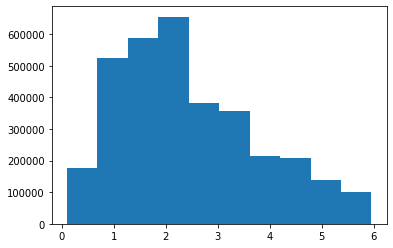

In [105]:
# Histogram of predictor 1 : Distance_to_sc
plt.hist(predictors['Distance_to_sc'])

**Observations:**

* This data looks skewed to the left.
* Now, one of the main assumptions of Linear Regression is that the features have to be normally distributed!
* Thus we apply **LOG TRANSFORMATION** to make it normal.

In [106]:
# Applying a log transformation 
predictors['Distance_to_sc_log'] = predictors['Distance_to_sc'].apply(math.log)

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([  3426.,   5898.,  22065.,  79733., 138538., 359676., 577360.,
        926789., 701928., 531149.]),
 array([-2.26625316, -1.86112583, -1.4559985 , -1.05087117, -0.64574384,
        -0.24061651,  0.16451082,  0.56963815,  0.97476548,  1.37989281,
         1.78502014]),
 <a list of 10 Patch objects>)

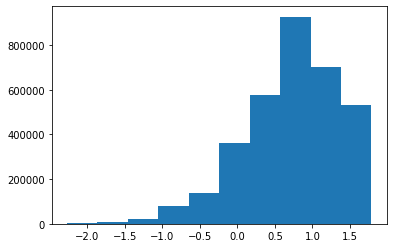

In [107]:
# Histogram of predictor 1 : Distance_to_sc after log transformation 
plt.hist(predictors['Distance_to_sc_log'])

**Predictor 2 : Distance_to_hospital**

(array([ 886692., 1081767.,  644313.,  247240.,  158374.,  141669.,
          41716.,   49877.,   56967.,   37947.]),
 array([0.0474 , 0.97957, 1.91174, 2.84391, 3.77608, 4.70825, 5.64042,
        6.57259, 7.50476, 8.43693, 9.3691 ]),
 <a list of 10 Patch objects>)

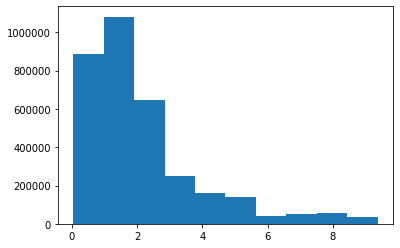

In [108]:
plt.hist(predictors['Distance_to_hospital'])

**Observations:**
* Thus, similar to the above, this is also slighlt skewed to the left.
* Hence, we apply a log transformation on this one too!

In [109]:
# Applying a log transformation 
predictors['Distance_to_hospital_log'] = predictors['Distance_to_hospital'].apply(math.log)

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([  3498.,   9777.,  42717.,  99639., 367395., 557604., 891737.,
        782934., 394973., 196288.]),
 array([-3.04913305, -2.52047804, -1.99182303, -1.46316802, -0.93451301,
        -0.405858  ,  0.122797  ,  0.65145201,  1.18010702,  1.70876203,
         2.23741704]),
 <a list of 10 Patch objects>)

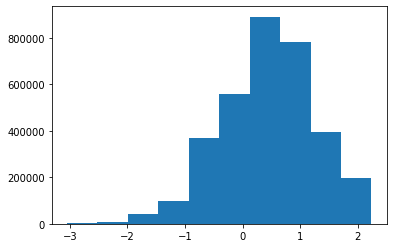

In [110]:
# Plotting after the transformation
plt.hist(predictors['Distance_to_hospital_log'])

**Predictor 3 : travel_min_to_CBD**

(array([ 35700., 271187., 223667., 468269., 387840., 569063., 664252.,
        341368., 159628., 225588.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <a list of 10 Patch objects>)

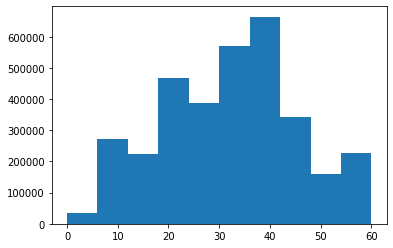

In [111]:
# Plotting the histogram on the original data 
plt.hist(predictors['travel_min_to_CBD'])

**Observations:**

* This distribution looks almost Normal.
* Hence, we can do some scaling to it!

In [112]:
# Assingning a min max value of 1, 10 
scaler = preprocessing.MinMaxScaler(feature_range =(1, 10))
predictors['travel_min_to_CBD_minmax'] = scaler.fit_transform(predictors[['travel_min_to_CBD']])

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(<matplotlib.axes._subplots.AxesSubplot at 0x28b04ea0908>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b04ea0908>)

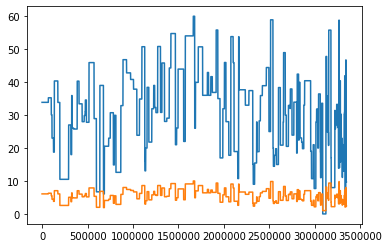

In [113]:
# Plotting both the original data and min-max data 
predictors["travel_min_to_CBD"].plot(), predictors["travel_min_to_CBD_minmax"].plot()

In [114]:
# Initializing the linear regression variable 
lm = LinearRegression()

# Splitting the final integrated data into training and testing data 
# test_size : 25% of the data proportion to be used as test sample 
# random_state : In order to control the random number generated. Popular seeds are 0 and 42
x_train, x_test, y_train, y_test = train_test_split(predictors[['travel_min_to_CBD','Distance_to_sc_log','Distance_to_hospital_log']], data_df['price'], test_size = 0.25, random_state = 50)

# Using the training data to fit the linear model 
lm.fit(x_train, y_train)

# Using the trained model to predict the model on the test data 
predicted_model = lm.predict(x_test)

# Generating the R-Squared value 
print("R-squared Value : ", lm.score(x_test, y_test))

# Generating the Mean Squared Error value
print("Mean Squared Error (MSE) Value : ", mean_squared_error(y_test, predicted_model))

# Generating the Root Mean Squared Error value
print("Root Mean Squared Error (RMSE) Value : ", math.sqrt(mean_squared_error(y_test, predicted_model)))

R-squared Value :  0.08006149558368458
Mean Squared Error (MSE) Value :  28481465580256.375
Root Mean Squared Error (RMSE) Value :  5336802.936239671


**Observations:**

* Thus, after applying the log-transformations, the R-Suared value has slightly increased.
* At the same time, we have been able to reduce the Mean Squared and Root Mean Squared Error values.

### Power Transformation
* This follows the idea that we transform both the target and predictor variables using some functions.

In [115]:
# Applying the power raised to 2 transformations 
predictors['Distance_to_sc_power'] = np.power(predictors.Distance_to_sc,2)
predictors['Distance_to_hospital_power'] = np.power(predictors.Distance_to_hospital,2)
predictors['travel_min_to_CBD_power'] = np.power(predictors.travel_min_to_CBD,2)

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [116]:
# Initializing the linear regression variable 
lm = LinearRegression()

# Splitting the final integrated data into training and testing data 
# test_size : 25% of the data proportion to be used as test sample 
# random_state : In order to control the random number generated. Popular seeds are 0 and 42
x_train, x_test, y_train, y_test = train_test_split(predictors[['travel_min_to_CBD_power','Distance_to_sc_power','Distance_to_hospital_power']], data_df['price'], test_size = 0.25, random_state = 50)

# Using the training data to fit the linear model 
lm.fit(x_train, y_train)

# Using the trained model to predict the model on the test data 
predicted_model = lm.predict(x_test)

# Generating the R-Squared value 
print("R-squared Value : ", lm.score(x_test, y_test))

# Generating the Mean Squared Error value
print("Mean Squared Error (MSE) Value : ", mean_squared_error(y_test, predicted_model))

# Generating the Root Mean Squared Error value
print("Root Mean Squared Error (RMSE) Value : ", math.sqrt(mean_squared_error(y_test, predicted_model)))

R-squared Value :  0.08530446526649615
Mean Squared Error (MSE) Value :  28319142272945.664
Root Mean Squared Error (RMSE) Value :  5321573.289258136


### Box-Cox Transformation
* This transforms the continuous variables into an almost normal distribution!

In [118]:
# Applying the box-cox transformations 
predictors['Distance_to_sc_boxcox'],_ = stats.boxcox(predictors['Distance_to_sc'])
predictors['Distance_to_hospital_boxcox'],_ = stats.boxcox(predictors['Distance_to_hospital'])
#predictors['travel_min_to_CBD_boxcox'],_ = stats.boxcox(predictors['travel_min_to_CBD'])

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
# Initializing the linear regression variable 
lm = LinearRegression()

# Splitting the final integrated data into training and testing data 
# test_size : 25% of the data proportion to be used as test sample 
# random_state : In order to control the random number generated. Popular seeds are 0 and 42
x_train, x_test, y_train, y_test = train_test_split(predictors[['travel_min_to_CBD','Distance_to_sc_boxcox','Distance_to_hospital_boxcox']], data_df['price'], test_size = 0.25, random_state = 50)

# Using the training data to fit the linear model 
lm.fit(x_train, y_train)

# Using the trained model to predict the model on the test data 
predicted_model = lm.predict(x_test)

# Generating the R-Squared value 
print("R-squared Value : ", lm.score(x_test, y_test))

# Generating the Mean Squared Error value
print("Mean Squared Error (MSE) Value : ", mean_squared_error(y_test, predicted_model))

# Generating the Root Mean Squared Error value
print("Root Mean Squared Error (RMSE) Value : ", math.sqrt(mean_squared_error(y_test, predicted_model)))

R-squared Value :  0.08457854018613786
Mean Squared Error (MSE) Value :  28341617047173.305
Root Mean Squared Error (RMSE) Value :  5323684.536782144


### 2.3.2  Data Normalization :- Z Transform and Min-Max <a class="anchor" id="sec_232"></a>
**Z-Score Normalization (standardization):**

* Here, the focus is on shifting the distribution of the data.
* We fix the data such that it's mean is 0 and standard deviation is 1
* Thus, we aim to rescale the variables and features so that they have the properties of a standard normal distribution!
* travel_min_to_CBD is measured on a different scale - minutes.
* Distance_to_sc and Distance_to_hospital - Haversine Distance in km.


In [121]:
# Performing the z tranformation scaling 
std_scale = preprocessing.StandardScaler().fit(predictors[['Distance_to_sc', 'travel_min_to_CBD']])
df_std = std_scale.transform(predictors[['Distance_to_sc', 'travel_min_to_CBD']]) # an array not a df

In [122]:
# Assigning the values to new generated columns 
predictors['Distance_to_sc_scaled'] = df_std[:,0] 
predictors['travel_min_to_CBD_scaled'] = df_std[:,1] 

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
predictors.describe()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,Distance_to_sc_log,Distance_to_hospital_log,travel_min_to_CBD_minmax,Distance_to_sc_power,Distance_to_hospital_power,travel_min_to_CBD_power,Distance_to_sc_boxcox,Distance_to_hospital_boxcox,Distance_to_sc_scaled,travel_min_to_CBD_scaled
count,3.346562e+06,3.346562e+06,3.346562e+06,3.346562e+06,3.346562e+06,3.346562e+06,3.346562e+06,3.346562e+06,3.346562e+06,3.346562e+06,3.346562e+06,3.346562e+06,3.346562e+06
mean,2.452747e+00,3.190144e+01,2.135016e+00,7.238818e-01,4.461817e-01,5.785215e+00,7.823998e+00,7.710456e+00,1.192934e+03,9.425086e-01,4.961172e-01,-8.517641e-14,-9.334876e-13
std,1.344631e+00,1.323753e+01,1.775434e+00,6.311831e-01,8.195484e-01,1.985629e+00,7.988077e+00,1.385939e+01,8.469531e+02,8.095454e-01,8.556510e-01,1.000000e+00,1.000000e+00
min,1.037000e-01,0.000000e+00,4.740000e-02,-2.266253e+00,-3.049133e+00,1.000000e+00,1.075369e-02,2.246760e-03,0.000000e+00,-1.488207e+00,-2.588515e+00,-1.746983e+00,-2.409924e+00
25%,1.415900e+00,2.180000e+01,9.445000e-01,3.477654e-01,-5.709959e-02,4.270000e+00,2.004773e+00,8.920803e-01,4.752400e+02,3.732057e-01,-5.691980e-02,-7.711013e-01,-7.630908e-01
50%,2.166500e+00,3.341667e+01,1.636000e+00,7.731130e-01,4.922542e-01,6.012500e+00,4.693722e+00,2.676496e+00,1.116674e+03,9.064928e-01,5.058911e-01,-2.128812e-01,1.144648e-01
75%,3.321200e+00,4.042857e+01,2.635600e+00,1.200326e+00,9.691109e-01,7.064286e+00,1.103037e+01,6.946387e+00,1.634469e+03,1.542074e+00,1.022915e+00,6.458675e-01,6.441638e-01
max,5.959700e+00,6.000000e+01,9.369100e+00,1.785020e+00,2.237417e+00,1.000000e+01,3.551802e+01,8.778003e+01,3.600000e+03,2.608945e+00,2.538345e+00,2.608116e+00,2.122644e+00


**Mean and Standard Deviation Values:**

In [124]:
# Printing out the mean value after Standardisation
print("Mean after standardisation")
print("Distance_to_sc = {:.2f}, travel_min_to_CBD = {:.2f}"
      .format(df_std[:,0].mean(), df_std[:,1].mean()))

print("\n")
# Printing out the standard deviation value after Standardisation
print("Standard deviation after standardisation:")
print("Distance_to_sc = {:.2f}, travel_min_to_CBD = {:.2f}"
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardisation
Distance_to_sc = -0.00, travel_min_to_CBD = 0.00


Standard deviation after standardisation:
Distance_to_sc = 1.00, travel_min_to_CBD = 1.00


**Observations:**
* Thus, we can see that the values of mean and standard deviation after the z transformation are 0 and 1 respectively!

In [125]:
%matplotlib inline

**Data before Normalization:**

(<matplotlib.axes._subplots.AxesSubplot at 0x28b04f1cdd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b04f1cdd8>)

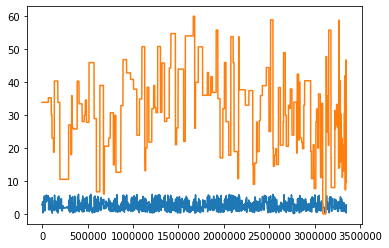

In [126]:
# Plotting the data before Normalisation 
predictors["Distance_to_sc"].plot(), predictors["travel_min_to_CBD"].plot()

**Data after Normalization:**
* Here, we observe the range and the centre of the distribution for the new features which have been standardised.
* Thus from the two plots we can see that the original and the standardised data are in the same shape but are shifted!

(<matplotlib.axes._subplots.AxesSubplot at 0x28b050f9978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b050f9978>)

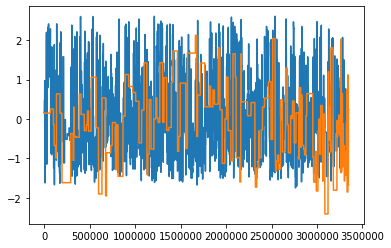

In [127]:
# Plotting the scaled data 
predictors["Distance_to_sc_scaled"].plot(), predictors["travel_min_to_CBD_scaled"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x28b051557f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b051557f0>)

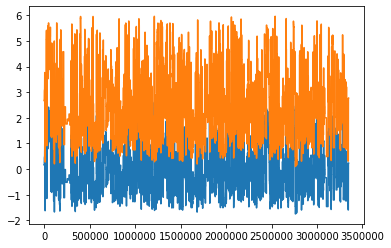

In [128]:
# Plotting the scaled and original data to compare
predictors["Distance_to_sc_scaled"].plot(), predictors["Distance_to_sc"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x28b0519e438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b0519e438>)

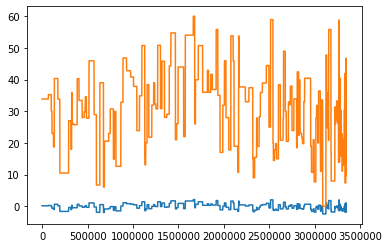

In [129]:
# Plotting the scaled and original data to compare
predictors["travel_min_to_CBD_scaled"].plot(), predictors["travel_min_to_CBD"].plot()

**Z-Tranformations: One predictor at a time!**

* From the above viualisations, we can see the behaviour of the parameters when we take them two at a time.
* We would now be considering them one at a time!

In [130]:
# Z_tranform on Distance_to_sc
std_scale = preprocessing.StandardScaler().fit(predictors[['Distance_to_sc']])
df_std = std_scale.transform(predictors[['Distance_to_sc']])
predictors['Distance_to_sc_z_transform'] = df_std[:,0]

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [131]:
# Z_tranform on Distance_to_hospital
std_scale = preprocessing.StandardScaler().fit(predictors[['Distance_to_hospital']])
df_std = std_scale.transform(predictors[['Distance_to_hospital']])
predictors['Distance_to_hospital_z_transform'] = df_std[:,0]

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [132]:
# Z_tranform on travel_min_to_CBD
std_scale = preprocessing.StandardScaler().fit(predictors[['travel_min_to_CBD']])
df_std = std_scale.transform(predictors[['travel_min_to_CBD']])
predictors['travel_min_to_CBD_z_transform'] = df_std[:,0]

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(<matplotlib.axes._subplots.AxesSubplot at 0x28b052295c0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b052295c0>)

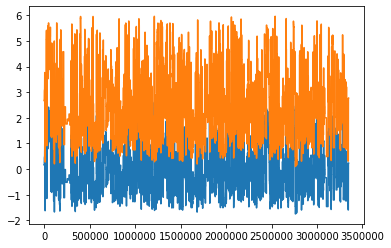

In [133]:
# Plotting the z_transformed data for Distance_to_sc
predictors["Distance_to_sc_z_transform"].plot(), predictors["Distance_to_sc"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x28b053fca20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b053fca20>)

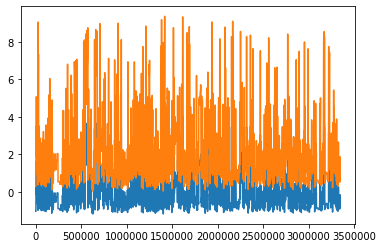

In [134]:
# Plotting the z_transformed data to Distance_to_hospital 
predictors["Distance_to_hospital_z_transform"].plot(), predictors["Distance_to_hospital"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x28b05461be0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b05461be0>)

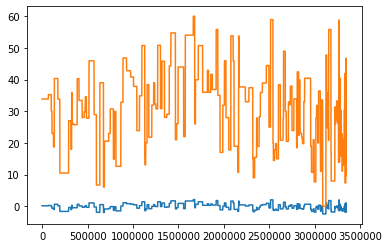

In [135]:
# Plotting the z_transformed data for travel_min_to_CBD
predictors["travel_min_to_CBD_z_transform"].plot(), predictors["travel_min_to_CBD"].plot()

### 2. MinMax Normalisation:

* In Min-Max Normalisation, we rescale the features or variables such that their values come in a specific range.


In [136]:
# Generating the min_max versions condidering two variables at a time 
minmax_scale = preprocessing.MinMaxScaler().fit(predictors[['Distance_to_sc', 'travel_min_to_CBD']])
df_minmax = minmax_scale.transform(predictors[['Distance_to_sc', 'travel_min_to_CBD']]) 

In [141]:
print(" Min-value after min-max scaling:")
print(" Distance_to_sc = {:.2f}, travel_min_to_CBD = {:.2f}"
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))

print("\n")

print(" Max-value after min-max scaling:")
print(" Distance_to_sc = {:.2f}, travel_min_to_CBD = {:.2f}"
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

 Min-value after min-max scaling:
 Distance_to_sc = 0.00, travel_min_to_CBD = 0.00


 Max-value after min-max scaling:
 Distance_to_sc = 1.00, travel_min_to_CBD = 1.00


**Observations:**

* Thus, we can see that the mean and standard deviation values have been normalised!
* They have taken the values of 0 and 1 respectively.

* Thus, we can see that the Minimum and Maximum values after scaling are 0 and 1 respectively.

**Min_Max Tranformations: One Variable at a time!**

In [142]:
# Performing the min-max normalisation for Distance_to_sc
minmax_scale = preprocessing.MinMaxScaler().fit(predictors[['Distance_to_sc']])
df_minmax = minmax_scale.transform(predictors[['Distance_to_sc']]) 
predictors['Distance_to_sc_minmax'] = df_minmax[:,0]

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [143]:
# Performing the min-max normalisation for Distance_to_hospital 
minmax_scale = preprocessing.MinMaxScaler().fit(predictors[['Distance_to_hospital']])
df_minmax = minmax_scale.transform(predictors[['Distance_to_hospital']]) 
predictors['Distance_to_hospital_minmax'] = df_minmax[:,0]

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [144]:
# Performing the min-max normalisation for travel_min_to_CBD 
minmax_scale = preprocessing.MinMaxScaler().fit(predictors[['travel_min_to_CBD']])
df_minmax = minmax_scale.transform(predictors[['travel_min_to_CBD']]) 
predictors['travel_min_to_CBD_minmax'] = df_minmax[:,0]

C:\Users\Gayatri Aniruddha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(<matplotlib.axes._subplots.AxesSubplot at 0x28b3defcd30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b3defcd30>)

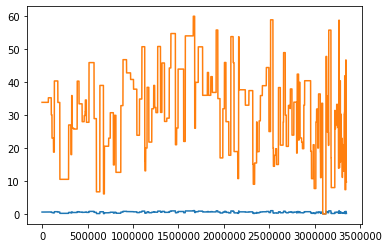

In [145]:
# Plotting the minmax_transformed data for travel_min_to_CBD
predictors["travel_min_to_CBD_minmax"].plot(), predictors["travel_min_to_CBD"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x28b05abc518>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b05abc518>)

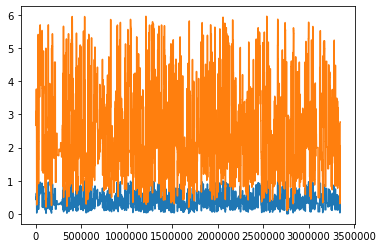

In [146]:
# Plotting the minmax_transformed data for Distance_to_sc
predictors["Distance_to_sc_minmax"].plot(), predictors["Distance_to_sc"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x28b05b2d240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28b05b2d240>)

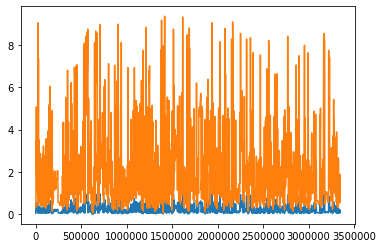

In [147]:
# Plotting the minmax_transformed data for Distance_to_hospital
predictors["Distance_to_hospital_minmax"].plot(), predictors["Distance_to_hospital"].plot()

# 3. Discussion and Analysis <a class="anchor" id="sec_3"> </a>

**For Task 1:**

After performing the various tasks associated with task 1, I have come to the following analysis and discussions:
* Performing this task of reading and integrating data was really insightful. We are seldom given datasets which are present in the same format. We are often given different data, in different formats and specifications. 
* It was comparatively easier to extract and read the data stored in json, html, excel and pdf formats. However, it took significant amount of time to read in the xml data and shape files data using regular expressions and shape files!
* Similarly, using the learnings of assignment 2, it was relatively easier to perform the task of distance calculation in order to calculate the nearest supermarket, shopping center, hospital and train-station.
* However, I had to spend quite a lot of time in order to merge the various Melbourne Train Information datasets, to calculate if there was a direct transfer between a given station and Flinders Street Railway Station. 

**For Task 2:**

After performing the various tasks associated with task 2, I have come to the following analysis and discussions:
* We were given three predictor variables and one target variable and we had to make a linear model using all sorts of normalisations and transformations possible!
* The difficult part was to understand which transformations had to be applied to which predictors in order to make their relationship more and more linear!
* Thus, I realised the importance of these Data Tranformations.
    * Data after transformations became more suitable for analysis.
    * It was able to improve the data visualizations.
    * It was also successful in fixing the skewness of the data.
    * It also improved the readability and interpretability of the data
* The log-transformation was able to make really highly skewed data, less skewed. Hence, this helps in meeting the statistical assumptions!
* Finally, after applying these transformations, viewing the visualizations and normalizing the data, we were able to reduced the errors and increase the R Squared values!

# 4. Conclusion <a class="anchor" id="sec_4"></a>

**In Conclusion, for TASK 1, we were able to perform the following activities as per the document specification**
* Thus, we were able to successfully read in all our different data files such as the json data, xml data, html data, pdf data, and excel data as follows!
    * **json data** using read_json function 
    * **xml data** using regular expressions 
    * **html data** using read_html function
    * **pdf data** using tabula 
    * **excel data** using read_excel function 

* We were even able to properly integrate the various files into one integrated format.

* Additionally, we were even able to successfully compute the required additional columns of:
    * Suburb in which the property is present 
    * Distance to the nearest shopping center
    * Nearest shopping center ID
    * Distance to the nearest hospital 
    * Nearest hospital ID
    * Distance to the nearest supermarket 
    * Nearest supermarket ID
    * Distance to the nearest train-station 
    * Nearest train-station ID
    * Minimum time taken to reach the CBD 
    * Transfer Flag indicating if there is a direct route 

**In Conclusion, for TASK 2, we were able to perform the following activities as per the document specification**
* We have successfully understood and the learnt the linear behaviour of the predictors on the target variable!
* Thus, we have been able to successfully able to first get an idea of the predictors without any normalizations or transformations. 
* We were able to split the data-set intro training and testing datasets and compute the various statistical values. 
* Then, we were even able to perform the various transformations such as log, power and box-cox on the predictors.
* We were even able to visulize the effects of these transformations by plotting plots before and after the required three transformations!
* We observed that on performing these transformations, we were able to:
    * **INCREASE THE VALUE OF R-SQUARED**
    * **DECREASE THE VALUE OF THE Mean Squared and Root Mean Squared Error.**
* Furthermore, we even perfomed z-transformation and min-max transformations on our predictor values.
* We have even been able to visualize these effects before and after performing these normalizations!

# 5. References <a class="anchor" id="sec_5"></a>


* Devin Jeanpierre(2009, March 5). How do I sort a dictionary by value? \
Retrieved from: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value


* Andrew(2019, August 21). You should (usually) log transform your positive data \
Retrived from: https://statmodeling.stat.columbia.edu/2019/08/21/you-should-usually-log-transform-your-positive-data/


* Bruno Scibilia(2015, March 30). How Could You Benefit from a Box-Cox Transformation? \
Retrived from: https://blog.minitab.com/blog/applying-statistics-in-quality-projects/how-could-you-benefit-from-a-box-cox-transformation


* Serafeim Loukas(2020, May 28). Everything you need to know about Min-Max normalization: A Python tutorial \
Retrived from: https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79


* Dario Radecic(2020, April 14). Here’s How To Calculate Distance Between 2 Geolocations in Python \
Retrived from: https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4